In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
from matplotlib import colors

In [4]:
lat_lon_df = pd.read_csv("../data/pref_lat_lon.csv")
population_2020_df = pd.read_csv("../data/population_2020.csv")
confirmed_cases_daily_df = pd.read_csv("../data/newly_confirmed_cases_daily.csv")

tmp_df = pd.merge(confirmed_cases_daily_df, lat_lon_df, on="pref_name")
merged_df = pd.merge(tmp_df, population_2020_df, on="pref_name")

In [7]:
# 時系列のカラム名の配列を取得する
time_columns = merged_df.columns[2:1210].values

In [8]:
# diff_dataをスケーリングし、scaled_dataとする
scaled_data = merged_df.copy()


for i in range(0, 46):
    scaled_data.loc[:, time_columns] = (
        merged_df.loc[:, time_columns] / merged_df["population"].loc[i] + 1e-4
    ) * 1000

/var/folders/k8/xq9_8lkd7bqc5dx7rlkdm0qr0000gn/T/ipykernel_16816/2571664797.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  scaled_data.loc[:, time_columns] = (
/var/folders/k8/xq9_8lkd7bqc5dx7rlkdm0qr0000gn/T/ipykernel_16816/2571664797.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  scaled_

In [9]:
heat_map_data = [
    [[row["lat"], row["lon"], row[idx]] for index, row in scaled_data.iterrows()]
    for idx in time_columns
]

heat_map_data

[[[43.064359, 141.347449, 0.1],
  [40.824294, 140.740054, 0.1],
  [39.70353, 141.152667, 0.1],
  [38.268737, 140.872183, 0.1],
  [39.718175, 140.103356, 0.1],
  [38.240127, 140.362533, 0.1],
  [37.750146, 140.466754, 0.1],
  [36.341817, 140.446796, 0.1],
  [36.56575, 139.883526, 0.1],
  [36.391205, 139.060917, 0.1],
  [35.857771, 139.647804, 0.1],
  [35.604563, 140.123179, 0.1],
  [35.689185, 139.691648, 0.1],
  [35.447505, 139.642347, 0.1],
  [37.901699, 139.022728, 0.1],
  [36.695274, 137.211302, 0.1],
  [36.594729, 136.62555, 0.1],
  [36.06522, 136.221641, 0.1],
  [35.665102, 138.568985, 0.1],
  [36.651282, 138.180972, 0.1],
  [35.39116, 136.722204, 0.1],
  [34.976987, 138.383057, 0.1],
  [35.180247, 136.906698, 0.1],
  [34.730547, 136.50861, 0.1],
  [35.004532, 135.868588, 0.1],
  [34.686492, 135.518992, 0.1],
  [34.69128, 135.183087, 0.1],
  [34.685296, 135.832745, 0.1],
  [34.224806, 135.16795, 0.1],
  [35.503463, 134.238258, 0.1],
  [35.472248, 133.05083, 0.1],
  [34.66132, 133.

In [18]:
x = [row["lat"] for index, row in scaled_data.iterrows() for idx in time_columns]
y = [row["lon"] for index, row in scaled_data.iterrows() for idx in time_columns]

# X, Y = np.meshgrid(x, y)
# Z = 0.01 * (X * np.sin(0.1 * X) + Y * np.cos(0.1 * Y))
Z = time_columns
# heatmapの内容
myheatdata = [row[idx] for index, row in scaled_data.iterrows() for idx in time_columns]

In [20]:
x = np.arange(0, 100, 1)
y = np.arange(0, 100, 1)
X, Y = np.meshgrid(x, y)
Z = 0.01 * (X * np.sin(0.1 * X) + Y * np.cos(0.1 * Y))

Z

array([[ 0.00000000e+00,  9.98334166e-04,  3.97338662e-03, ...,
        -2.63607808e-01, -3.59149547e-01, -4.52960535e-01],
       [ 9.95004165e-03,  1.09483758e-02,  1.39234283e-02, ...,
        -2.53657766e-01, -3.49199505e-01, -4.43010493e-01],
       [ 1.96013316e-02,  2.05996657e-02,  2.35747182e-02, ...,
        -2.44006476e-01, -3.39548215e-01, -4.33359203e-01],
       ...,
       [-9.33493933e-01, -9.32495599e-01, -9.29520547e-01, ...,
        -1.19710174e+00, -1.29264348e+00, -1.38645447e+00],
       [-9.11817747e-01, -9.10819412e-01, -9.07844360e-01, ...,
        -1.17542555e+00, -1.27096729e+00, -1.36477828e+00],
       [-8.80299241e-01, -8.79300907e-01, -8.76325854e-01, ...,
        -1.14390705e+00, -1.23944879e+00, -1.33325978e+00]])

ValueError: Argument Z must be 2-dimensional.

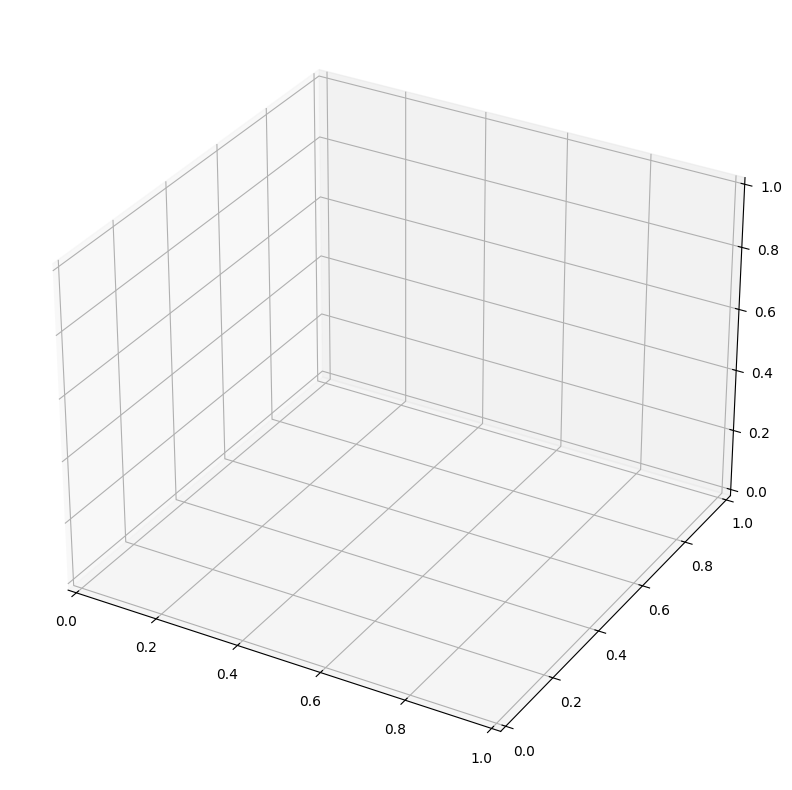

In [17]:
# 3次元ヒートマップ
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111, projection="3d")

# 　プロット内容
# x = np.arange(0, 100, 1)
# y = np.arange(0, 100, 1)
X = [row["lat"] for index, row in scaled_data.iterrows() for idx in time_columns]
Y = [row["lon"] for index, row in scaled_data.iterrows() for idx in time_columns]

# X, Y = np.meshgrid(x, y)
# Z = 0.01 * (X * np.sin(0.1 * X) + Y * np.cos(0.1 * Y))
Z = time_columns
# heatmapの内容
myheatdata = [row[idx] for index, row in scaled_data.iterrows() for idx in time_columns]
# heatmapの内容をfacecolors用に[0-1]に正規化
norm = colors.Normalize(vmin=np.min(myheatdata), vmax=np.max(myheatdata))
norm_myheatdata = norm(myheatdata)
# プロット
surf = ax.plot_surface(
    X, Y, Z, facecolors=cm.CMRmap(norm_myheatdata), cmap=plt.get_cmap("CMRmap")
)
# 軸ラベル
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
# カラーバーを表示（カラーバーに使う目盛は正規化前のheatdataの尺度で表示する）
m = cm.ScalarMappable(cmap=surf.cmap, norm=norm)
m.set_array(myheatdata)
fig.colorbar(m, shrink=0.6, label="myheatdata")
plt.show()